In [1]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
# 트리맵 시각화
import squarify

# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [33]:
df = pd.read_csv("/Users/crlee/pandas/서울시_골목상권_최종.csv",encoding='cp949',low_memory=False)
df

,상권_코드_명,상권별_매출액_평균,상권별_매출건수_평균,프랜차이즈_점포_수,식료품_지출_총금액,교통_지출_총금액,점포_수,개업_점포_수,폐업_점포_수,시군구_명,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
0,4.19민주묘지역 2번,1.787499e+08,9819.157895,15,153409088.0,89964172.0,77,9,1,강북구,8131,7759,9025
1,KT&G 북부지사,1.489174e+08,13111.862745,4,103482570.0,37930942.0,37,3,0,강북구,3467,3724,2559
2,가오리역 1번,1.736823e+08,11684.989011,13,134732302.0,83764265.0,124,18,3,강북구,18027,19683,21346
3,가오리역 2번,1.330093e+08,6844.849057,6,345845765.0,214115966.0,77,8,2,강북구,9648,8522,13194
4,강북구청,1.955185e+08,9232.649351,9,236654594.0,115900636.0,148,20,4,강북구,25973,26332,29576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,청계산원터골,7.587535e+08,14597.947368,2,24543421.0,15065999.0,38,3,1,서초구,0,0,0
1083,청계산입구역 2번(내곡동주민센터),5.359684e+08,21851.812500,0,87820910.0,65330848.0,37,5,1,서초구,233,220,73
1084,한국상담대학원대학교,6.713270e+08,7856.526316,1,46411277.0,38677343.0,22,3,0,서초구,2135,1469,2776
1085,한전아트센터,6.967944e+07,4528.289474,2,86420436.0,69108438.0,54,8,1,서초구,13655,11549,13110


### 총매출액으로 내림차순

In [34]:
df = df.sort_values('상권별_매출액_평균', ascending=False)
df

,상권_코드_명,상권별_매출액_평균,상권별_매출건수_평균,프랜차이즈_점포_수,식료품_지출_총금액,교통_지출_총금액,점포_수,개업_점포_수,폐업_점포_수,시군구_명,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
486,남정초등학교,4.088895e+09,104803.583333,0,31103732.0,19471628.0,62,2,0,용산구,1304,1292,794
475,영등포시장역 3번,2.648102e+09,128401.103448,4,67485084.0,54470196.0,33,2,0,영등포구,1741,1487,2087
976,성수초등학교,1.761761e+09,67107.201681,42,368158497.0,249293723.0,518,63,11,성동구,32889,27065,23708
975,성수동카페거리,1.704766e+09,34202.673684,20,426202454.0,257510548.0,427,70,12,성동구,18310,18186,9916
844,삼성중앙역 5번,1.663697e+09,11774.421053,2,67684921.0,58484050.0,40,4,1,강남구,4971,5332,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,백석중학교,1.365018e+07,848.642857,3,411769193.0,275045568.0,48,5,1,강서구,17417,13433,24287
778,덕산중학교,1.347007e+07,294.692308,1,182015758.0,110726834.0,24,5,1,은평구,11092,8685,15034
791,수색역 1번,9.737607e+06,341.833333,1,68026923.0,36611056.0,17,0,0,은평구,2326,1892,2451
386,청림동주민센터(상도중학교),6.867693e+06,152.571429,3,267063523.0,133784026.0,51,10,1,관악구,11745,9991,19726


### 점포수 선형식 구하기 

Text(0.5, 0, '점포_수')

Text(0, 0.5, '상권별_매출액_평균')

Text(0.5, 1.0, '점포수-총매출액 선형식')

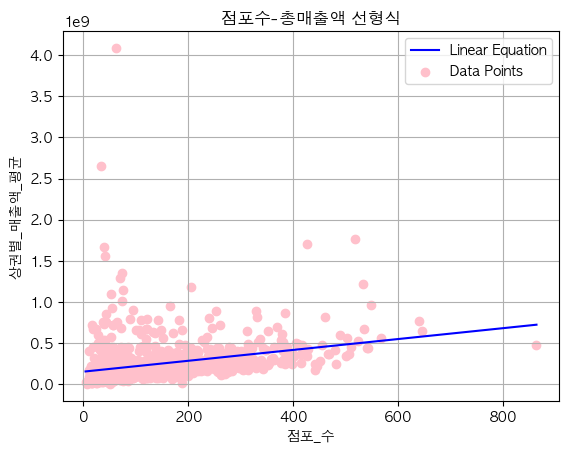

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임에서 x 열과 y 열을 선택합니다.
x = df['점포_수']
y = df['상권별_매출액_평균']

# 선형식을 구하기 위해 polyfit 함수를 사용하여 최소제곱법을 적용합니다.
coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]

# x 값 범위를 정의합니다.
x_range = np.linspace(x.min(), x.max(), 100)

# 선형식을 계산합니다.
y_range = slope * x_range + intercept

# 선형식을 그래프로 그립니다.
plt.plot(x_range, y_range, color='blue', label='Linear Equation')

# 산점도를 그래프로 그립니다.
plt.scatter(x, y, color='pink', label='Data Points')

# 축 레이블과 제목을 설정합니다.
plt.xlabel('점포_수')
plt.ylabel('상권별_매출액_평균')
plt.title('점포수-총매출액 선형식')

# 그래프에 그리드를 추가합니다.
plt.grid(True)

# 범례(legend)를 표시합니다.
plt.legend()

# 그래프를 표시합니다.
plt.show()

### 점포 수 산점도

### 프렌차이즈 점포 수 선형식

Text(0.5, 0, '프랜차이즈_점포_수')

Text(0, 0.5, '상권별_매출액_평균')

Text(0.5, 1.0, '프랜차이즈_점포_수-총매출액 선형식')

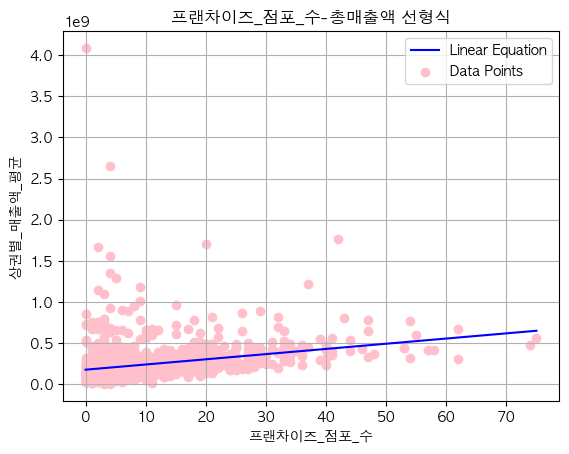

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임에서 x 열과 y 열을 선택합니다.
x = df['프랜차이즈_점포_수']
y = df['상권별_매출액_평균']

# 선형식을 구하기 위해 polyfit 함수를 사용하여 최소제곱법을 적용합니다.
coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]

# x 값 범위를 정의합니다.
x_range = np.linspace(x.min(), x.max(), 100)

# 선형식을 계산합니다.
y_range = slope * x_range + intercept

# 선형식을 그래프로 그립니다.
plt.plot(x_range, y_range, color='blue', label='Linear Equation')

# 산점도를 그래프로 그립니다.
plt.scatter(x, y, color='pink', label='Data Points')

# 축 레이블과 제목을 설정합니다.
plt.xlabel('프랜차이즈_점포_수')
plt.ylabel('상권별_매출액_평균')
plt.title('프랜차이즈_점포_수-총매출액 선형식')

# 그래프에 그리드를 추가합니다.
plt.grid(True)

# 범례(legend)를 표시합니다.
plt.legend()

# 그래프를 표시합니다.
plt.show()

### 프렌차이즈 수 산점도

Text(0.5, 0, '프랜차이즈_점포_수')

Text(0, 0.5, '상권별_매출액_평균')

Text(0.5, 1.0, '프랜차이즈_점포_수 산점도')

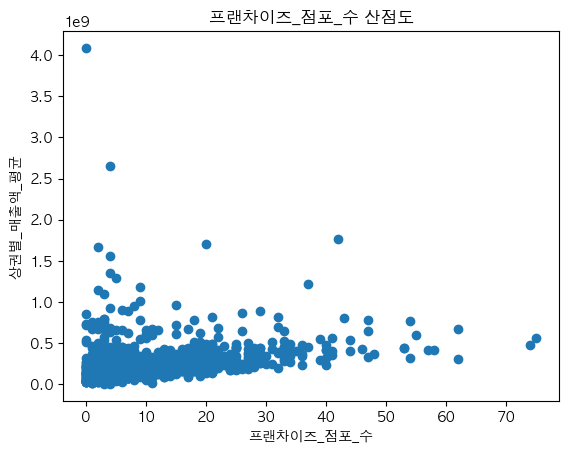

In [37]:
import matplotlib.pyplot as plt

x = df['프랜차이즈_점포_수']
y = df['상권별_매출액_평균']

plt.scatter(x,y) # 산점도 그래프


# 그래프 레이블 및 제목 설정
plt.xlabel('프랜차이즈_점포_수')
plt.ylabel('상권별_매출액_평균')
plt.title('프랜차이즈_점포_수 산점도')

# 그래프 표시
plt.show()


Text(0.5, 0, '상권별_매출건수_평균')

Text(0, 0.5, '상권별_매출액_평균')

Text(0.5, 1.0, '상권별_매출건수_평균-총매출액 선형식')

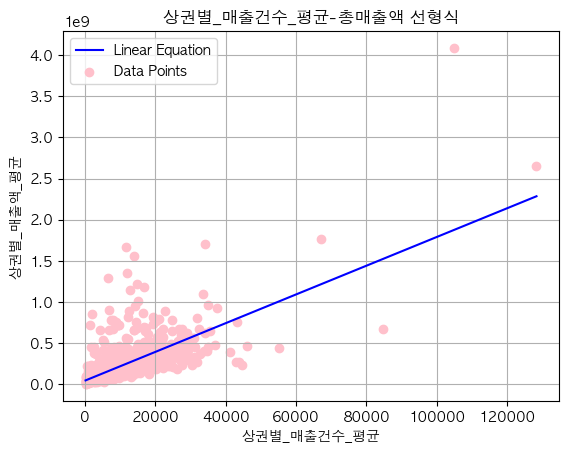

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임에서 x 열과 y 열을 선택합니다.
x = df['상권별_매출건수_평균']
y = df['상권별_매출액_평균']

# 선형식을 구하기 위해 polyfit 함수를 사용하여 최소제곱법을 적용합니다.
coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]

# x 값 범위를 정의합니다.
x_range = np.linspace(x.min(), x.max(), 100)

# 선형식을 계산합니다.
y_range = slope * x_range + intercept

# 선형식을 그래프로 그립니다.
plt.plot(x_range, y_range, color='blue', label='Linear Equation')

# 산점도를 그래프로 그립니다.
plt.scatter(x, y, color='pink', label='Data Points')

# 축 레이블과 제목을 설정합니다.
plt.xlabel('상권별_매출건수_평균')
plt.ylabel('상권별_매출액_평균')
plt.title('상권별_매출건수_평균-총매출액 선형식')

# 그래프에 그리드를 추가합니다.
plt.grid(True)

# 범례(legend)를 표시합니다.
plt.legend()

# 그래프를 표시합니다.
plt.show()

### 파이차트 

In [39]:
# 식료품_지출_총금액 평균

# 교통_지출_총금액 평균

# 총 지출액 평균

# 파이차트 

### 막대그래프

In [40]:
# 상권별 매출건수

### 점포 수 관련 

In [41]:
# 점포수
# 프렌차이즈 점포 수 
# 개업 점포 수 
# 폐업 점포 수

# 비교 


### 남정초등학교

In [42]:
df

,상권_코드_명,상권별_매출액_평균,상권별_매출건수_평균,프랜차이즈_점포_수,식료품_지출_총금액,교통_지출_총금액,점포_수,개업_점포_수,폐업_점포_수,시군구_명,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
486,남정초등학교,4.088895e+09,104803.583333,0,31103732.0,19471628.0,62,2,0,용산구,1304,1292,794
475,영등포시장역 3번,2.648102e+09,128401.103448,4,67485084.0,54470196.0,33,2,0,영등포구,1741,1487,2087
976,성수초등학교,1.761761e+09,67107.201681,42,368158497.0,249293723.0,518,63,11,성동구,32889,27065,23708
975,성수동카페거리,1.704766e+09,34202.673684,20,426202454.0,257510548.0,427,70,12,성동구,18310,18186,9916
844,삼성중앙역 5번,1.663697e+09,11774.421053,2,67684921.0,58484050.0,40,4,1,강남구,4971,5332,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,백석중학교,1.365018e+07,848.642857,3,411769193.0,275045568.0,48,5,1,강서구,17417,13433,24287
778,덕산중학교,1.347007e+07,294.692308,1,182015758.0,110726834.0,24,5,1,은평구,11092,8685,15034
791,수색역 1번,9.737607e+06,341.833333,1,68026923.0,36611056.0,17,0,0,은평구,2326,1892,2451
386,청림동주민센터(상도중학교),6.867693e+06,152.571429,3,267063523.0,133784026.0,51,10,1,관악구,11745,9991,19726


In [44]:
df_nj = df.iloc[[0]]
df_nj

,상권_코드_명,상권별_매출액_평균,상권별_매출건수_평균,프랜차이즈_점포_수,식료품_지출_총금액,교통_지출_총금액,점포_수,개업_점포_수,폐업_점포_수,시군구_명,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
486,남정초등학교,4.088895e+09,104803.583333,0,31103732.0,19471628.0,62,2,0,용산구,1304,1292,794
